# Многоклассовая классификация и множественная классификация/регрессия
Винник Екатерина Петровна, 22.М04

# Задача

- [+] Изучите [возможности sklearn](https://scikit-learn.org/stable/modules/multiclass.html#multiclass-classification) для решения задач **Multiclass classification**, **Multilabel classification** и **Multioutput Regression**. Основные компоненты библиотеки указаны на рисунке ниже.
![multi_org_chart](https://scikit-learn.org/stable/_images/multi_org_chart.png)

- [+] Найдите данные, на которых можно решить задачу **Multiclass classification** (классификация с более чем двумя классами). В крайнем случае преобразуйте данные, предназначенные для другой задачи.
- [+] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи.
- [+] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [+] Используя стратегии **OneVsRest**, **OneVsOne** и **OutputCode** решите задачу **Multiclass classification** для каждого из пройденных базового алгоритма классификации (**logistic regression, svm, knn, naive bayes, decision tree**). При обучении использовать **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания.
- [+] Замерить время обучения каждой модели для каждой стратегии.
- [+] Для оценки качества моделей используйте метрику **AUC-ROC**.
- [+] Сравнить время обучения и качество всех моделей и всех стратегий. Сделать выводы.
- [ ] (**+3 балла**) Повторить все пункты для задачи **Multilabel classification** (классификация с несколькими целевыми признаками, например, бинарными). В качестве стратегий попробовать **MultiOutputClassifier** и **ClassifierChain**.
- [+] (**+2 балла**) Повторить все пункты для задачи **Multioutput Regression** (регрессия с несколькими целевыми признаками, вещественными). Модель попробовать как минимум одну: **Ridge**. В качестве стратегий попробовать **MultiOutputRegressor** и **RegressorChain**. В качестве метрики использовать **R2**.

## Multiclass classification
### Классификация стекла по типам

Классификация стекла по типам
- RI: refractive index
- Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- Mg: Magnesium
- Al: Aluminum
- Si: Silicon
- K: Potassium
- Ca: Calcium
- Ba: Barium
- Fe: Iron
- Type of glass: (class attribute)
    -  1 building windows float processed 
    -  2 building windows non float processed 
    -  3 vehicle windows float processed
    - 4 vehicle windowsnon float processed (none in this database)
    - 5 containers
    - 6 tableware
    - 7 headlamps

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения


In [2]:
df = pd.read_csv('./glass_types.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### EDA

Посмотрим, сколько каких значений принимает признак Type.

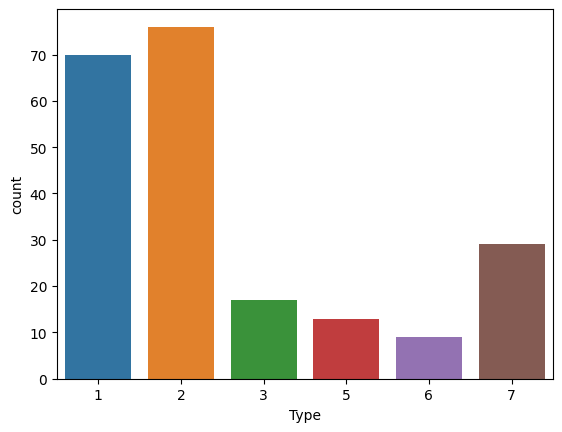

In [3]:
sns.countplot(x="Type", data=df)
plt.show()

Стекло бывает 7 типов, при этом типы 1 и 2 -- наиболее популярные, а тип 6 -- наименее популярный.

Посмотрим на корелляцию между признаками.

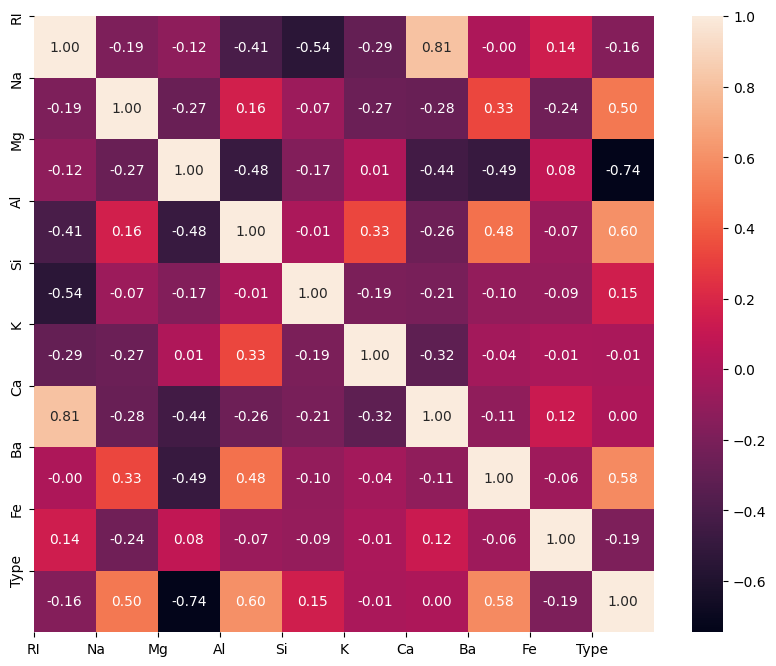

In [4]:
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

Из матрицы видно, что наличие кальция (Ca) сильно кореллирует с показателем преломления (Refractive index), а наличие магния (Mg) или алюминия (Al) достаточно сильно определяет то, каким будет тип стекла. Меньше на тип стикла влияет наличие бария (Ba) или натрия (Na).

Рассмотрим какое количество образцов соответствует заданному количеству веществ.

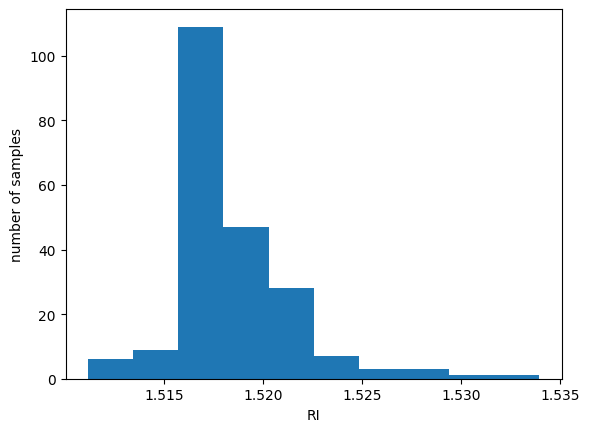

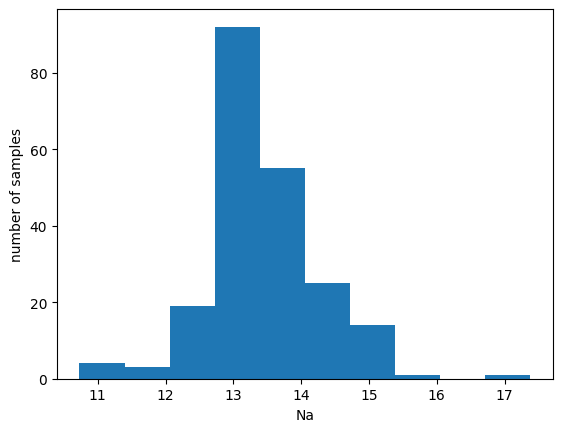

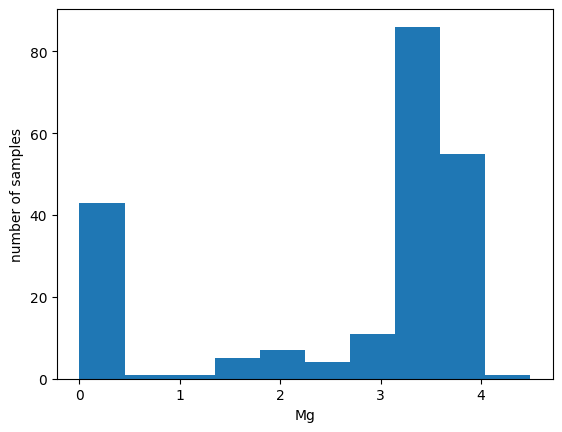

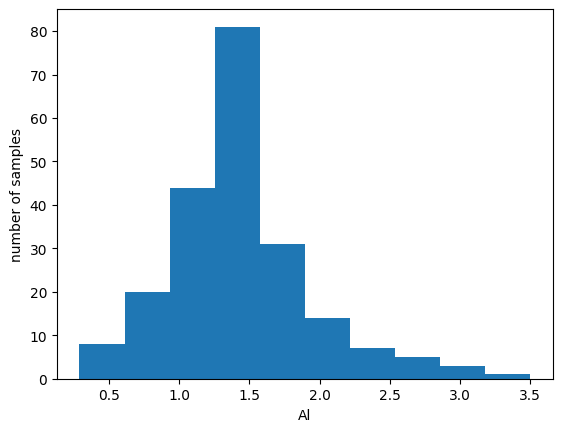

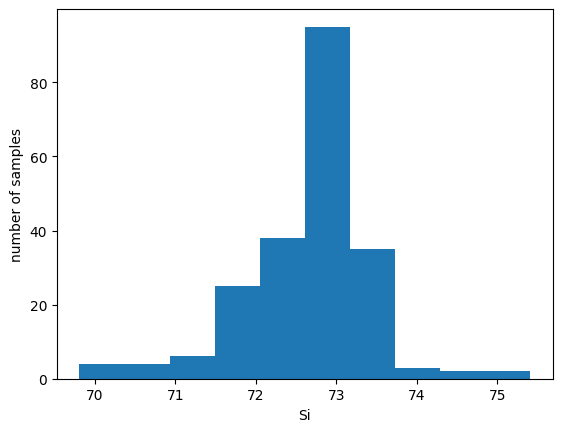

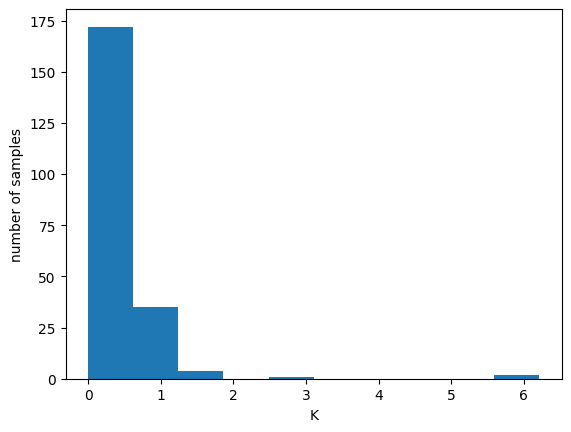

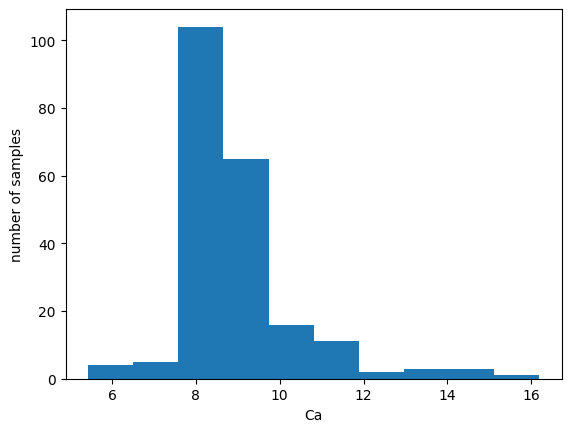

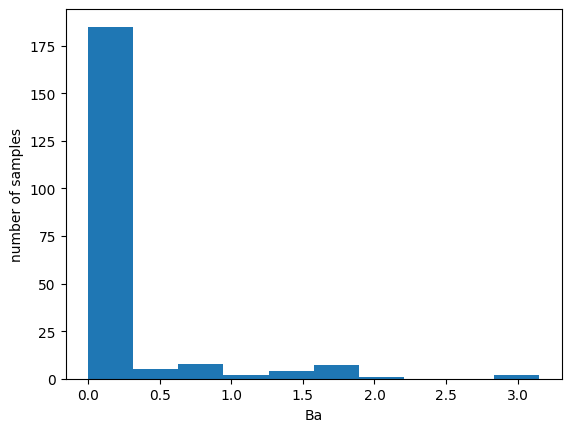

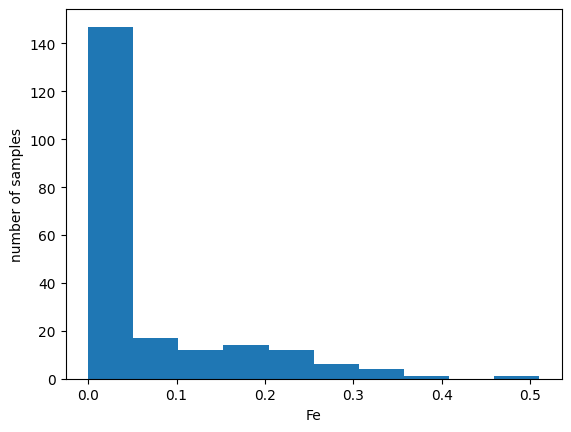

In [5]:
#numerical features
numerical = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

for i in df[numerical].columns:
    plt.hist(df[numerical][i])
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('number of samples')
    plt.show()    

- у большинства образцов стекла показатель преломления (RI) варьируется между 1.515 и 1.520
- у большинства образцов стекла количество натрия варьируется между 12 и 15 (более 80 образцов имеют показатель 13)
- большинство образцов стекла содержат магния (Mg) от 3 до 4 (более 80 проб), хотя есть много образцов стекла без содержания магния (чуть больше 40 проб)
- более 80 образцов содержат количество Al 1.5
- более 80 образцов содержат количество Si 73
- количества содержания алюминия и кремния нормально распределены
- большинство образцов стекла не содержат K
- более 100 образцов содержат количество Ca 8
- большинство образцов стекла не содержат бария (Ba)
- большинство образцов стекла не содержат железа (Fe)

Рассмотрим количества различных образцов стекла в контексте зависимости от типа стекла

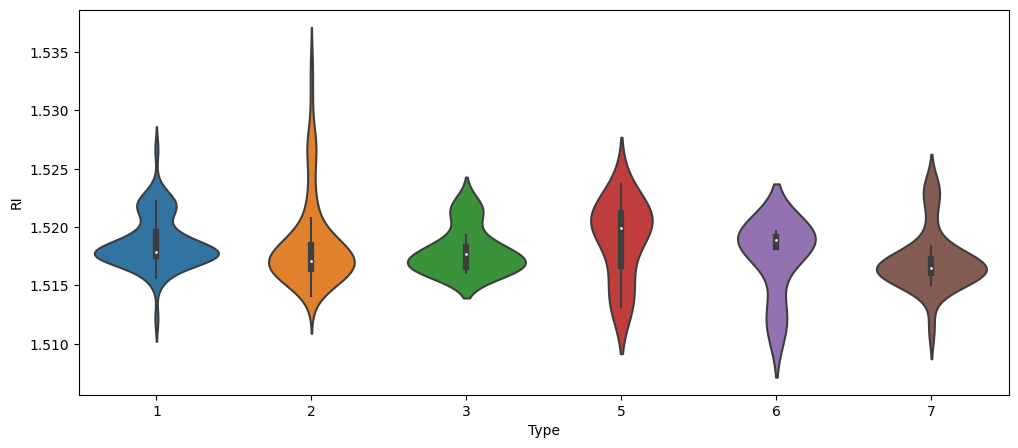

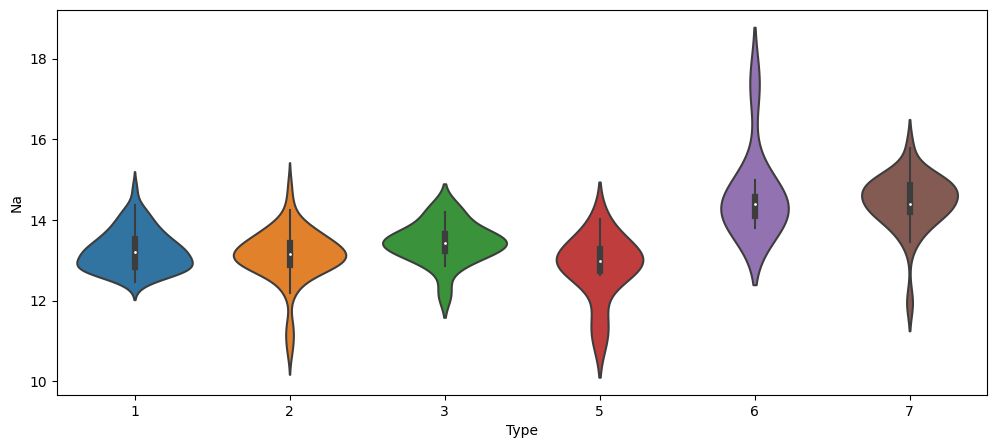

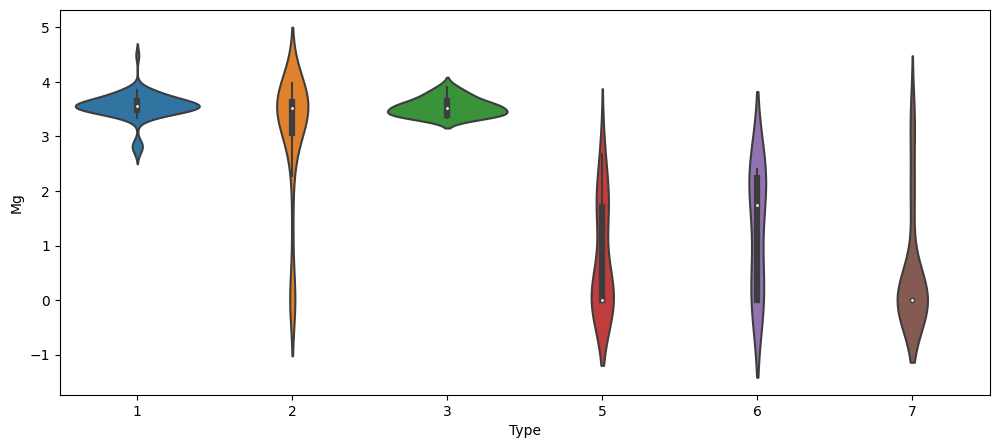

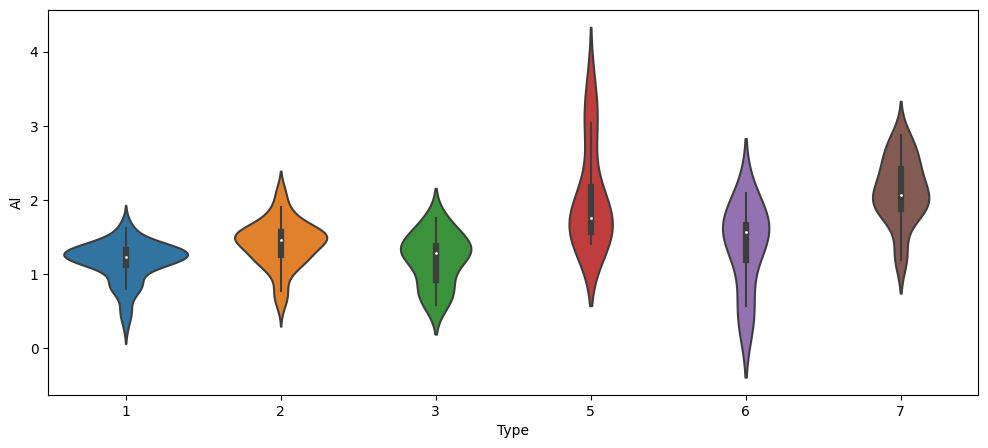

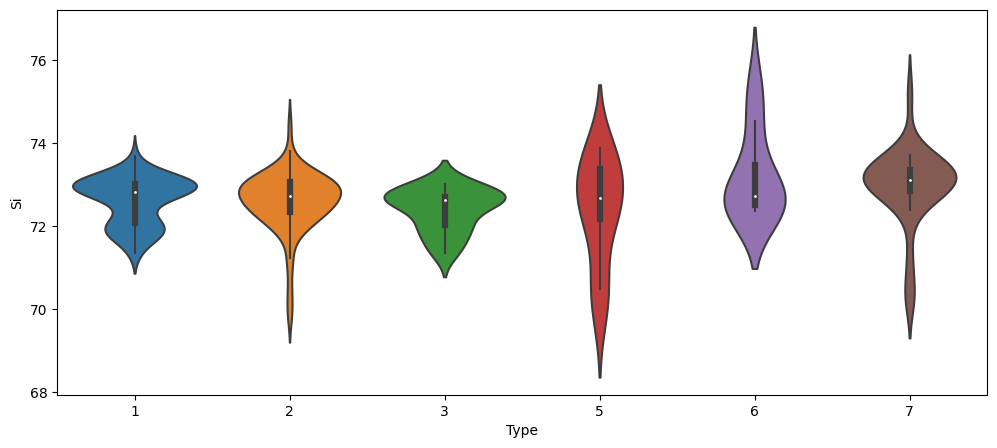

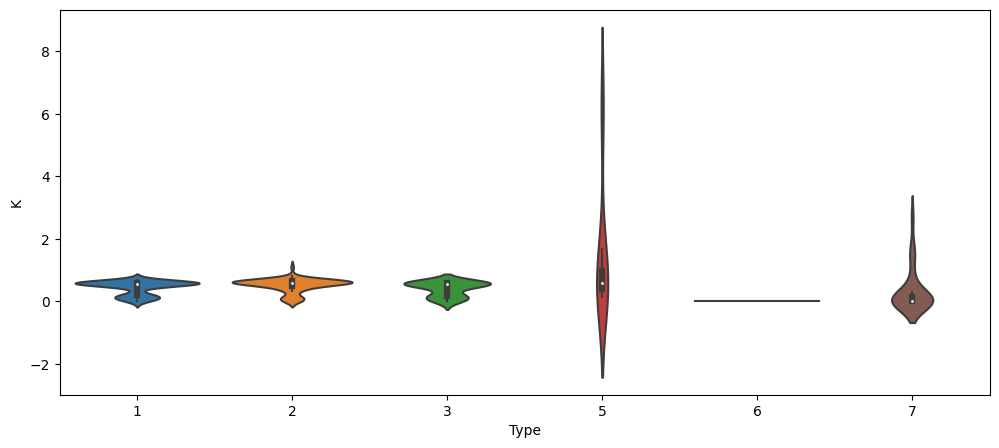

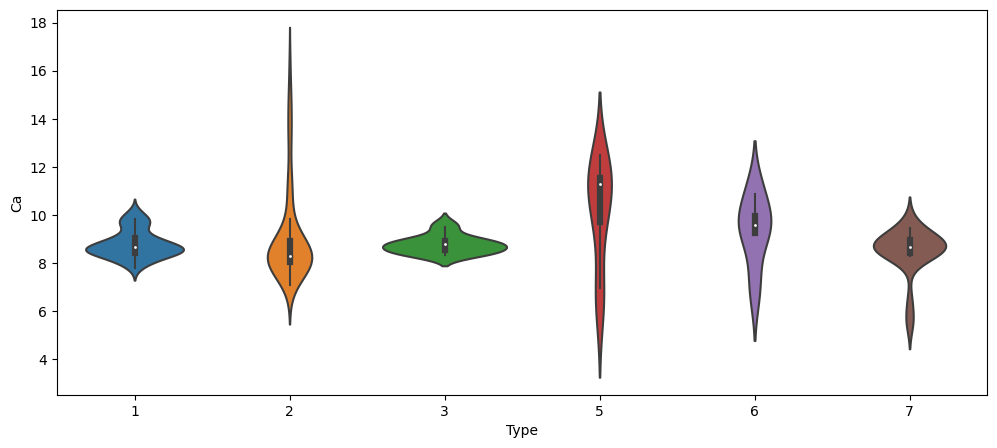

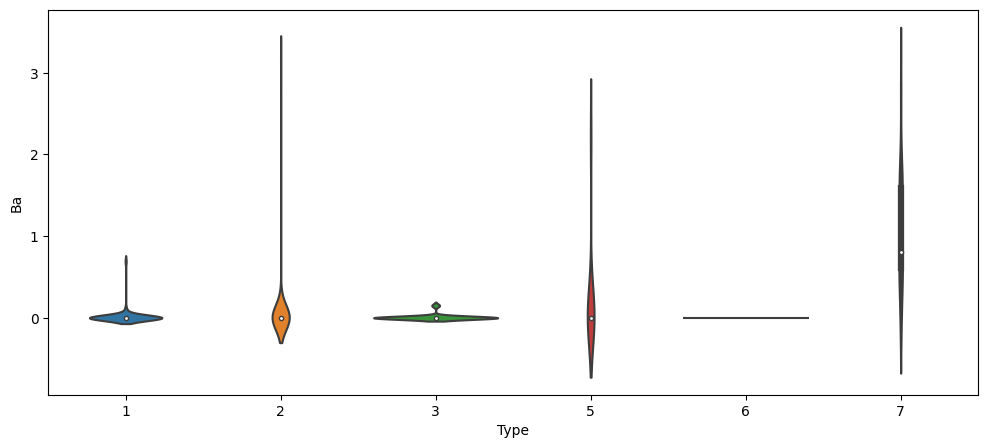

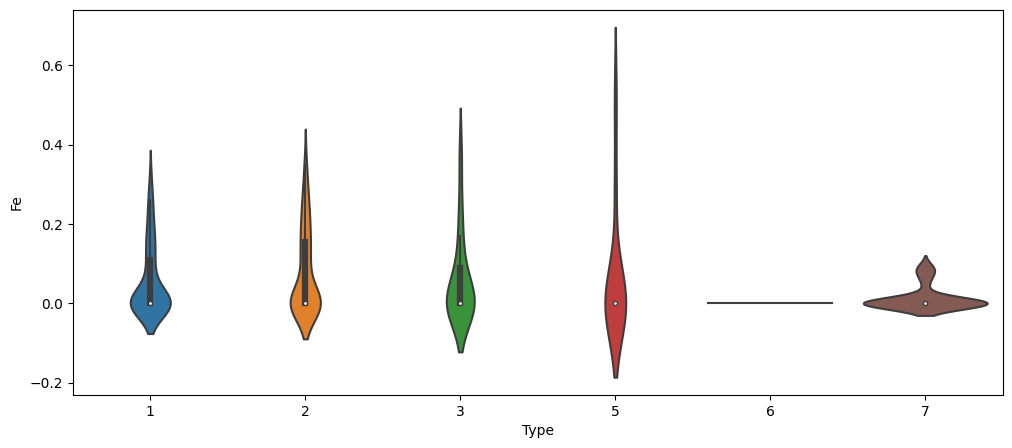

In [6]:
for i in df[numerical].columns:
    sns.violinplot(data=df,x="Type", y=i, split=True)
    fig = plt.gcf()
    fig.set_size_inches(12, 5)
    plt.show()


- Большинство образцов, не содержащих железа (Fe), бария (Ba), калия (K), принадлежат к типу стекла 6 (посуде), наименее распространенному типу в этом датасете
- Самый низкий показатель преломления достигается у типа стекла 6 (посуда), а самый высокий у типа стекла 2 (у стекол в зданиях)
- Наибольшее количество проб кальция (Ca) наблюдается у типов стекол 1 (cтекла зданий), 3 (стекла в транспортных средствах), 7 (стекла в настольных лампах)

In [7]:
df['Ba'].value_counts()

0.00    176
0.64      2
1.57      2
0.09      2
1.59      2
0.11      2
3.15      1
0.81      1
1.64      1
1.06      1
0.54      1
2.88      1
1.38      1
1.55      1
0.67      1
1.71      1
0.56      1
0.63      1
0.53      1
0.66      1
0.61      1
0.27      1
0.69      1
0.40      1
0.14      1
0.76      1
1.68      1
1.63      1
1.19      1
0.24      1
2.20      1
0.15      1
0.06      1
1.67      1
Name: Ba, dtype: int64

In [8]:
df['Fe'].value_counts()

0.00    144
0.24      7
0.17      7
0.09      6
0.10      5
0.11      4
0.16      3
0.28      3
0.12      3
0.22      3
0.14      3
0.07      3
0.19      2
0.15      2
0.08      2
0.06      1
0.21      1
0.05      1
0.51      1
0.37      1
0.35      1
0.25      1
0.18      1
0.34      1
0.29      1
0.30      1
0.20      1
0.32      1
0.26      1
0.03      1
0.31      1
0.01      1
Name: Fe, dtype: int64

### Feature engineering

Так как размеры датасета не являются большими и ни у одного из рассмотренных признаков нет доминирующих значений (например, даже у бария (Ba) только 176 из 214 элементов принимают значение 0.0), кажется, что нет необходимости отбрасывать ни один из признаков, а также конструировать новые.

### Разбиение данных с использованием train_test_split и масштабирование

In [9]:
X = df.drop('Type', axis = 1).values
y = df['Type'].values.reshape(-1,1)
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (160, 9)
Shape of X_test:  (54, 9)
Shape of y_train:  (160, 1)
Shape of y_test (54, 1)


### Обучение моделей

#### Logistic regression

In [10]:
# Fitting Logistic Regression to the Training set
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier

classifier_lr = LogisticRegression()
steps = [
    ('scalar', StandardScaler()),
    ('model', LogisticRegression(random_state=42))
]

lr_pipe = Pipeline(steps)

In [11]:
import time

parameters = { 'model__C' : [1,10,100,1000,10000],
               'model__fit_intercept' : [True],
               'model__multi_class' : ['auto'],
               'model__tol' : [0.0001],
               'model__solver' : ['newton-cg', 'lbfgs', 'sag', 'saga'],
               'model__n_jobs' : [-1],
               'model__max_iter' : [5000]
}

model = GridSearchCV(lr_pipe, parameters, scoring='roc_auc', cv = 3)

classifier_lr_ovo = OneVsOneClassifier(model)
start_lr_ovo = time.time()
classifier_lr_ovo = classifier_lr_ovo.fit(X_train, y_train.ravel())
training_time_lr_ovo = time.time() - start_lr_ovo

classifier_lr_ovr = OneVsRestClassifier(model)
start_lr_ovr = time.time()
classifier_lr_ovr = classifier_lr_ovr.fit(X_train, y_train.ravel())
training_time_lr_ovr = time.time() - start_lr_ovr

classifier_lr_oc = OutputCodeClassifier(model)
start_lr_oc = time.time()
classifier_lr_oc = classifier_lr_oc.fit(X_train, y_train.ravel())
training_time_lr_oc = time.time() - start_lr_oc

Training set using ovo classifier:  0.7  time for training:  34.93851375579834
Test set using ovo classifier:  0.6666666666666666


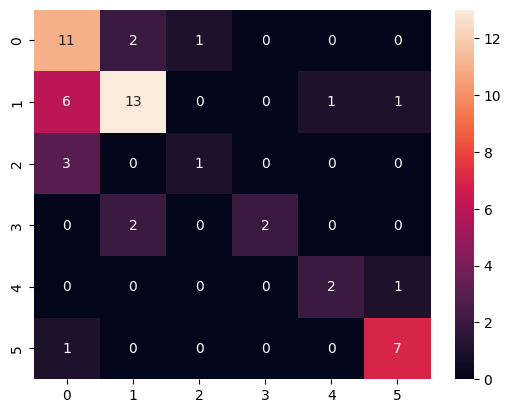

Training set using ovr classifier:  0.675  time for training:  25.63313341140747
Test set using ovr classifier:  0.7407407407407407


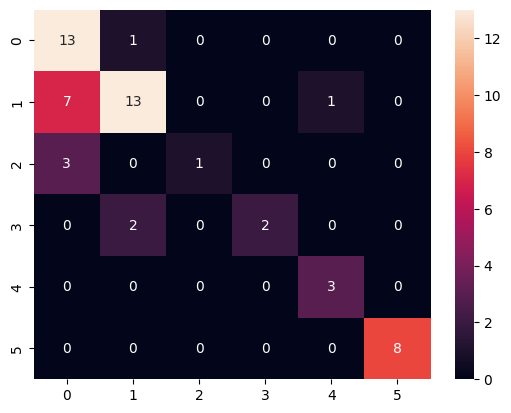

Training set using output code classifier:  0.6625  time for training:  33.79649901390076
Test set using output code classifier:  0.7037037037037037


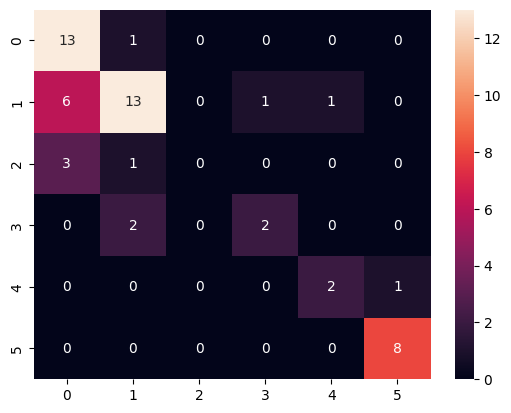

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# 1 - 1
y_pred_lr_train = classifier_lr_ovo.predict(X_train)
accuracy_lr_train_ovo = accuracy_score(y_train, y_pred_lr_train)
print("Training set using ovo classifier: ", accuracy_lr_train_ovo, " time for training: ", training_time_lr_ovo)

y_pred_lr_test = classifier_lr_ovo.predict(X_test)
accuracy_lr_test_ovo = accuracy_score(y_test, y_pred_lr_test)
print("Test set using ovo classifier: ", accuracy_lr_test_ovo)
sns.heatmap(confusion_matrix(y_test, y_pred_lr_test), annot=True, fmt='.0f')
plt.show()

# 1 - rest
y_pred_lr_train = classifier_lr_ovr.predict(X_train)
accuracy_lr_train_ovr = accuracy_score(y_train, y_pred_lr_train)
print("Training set using ovr classifier: ", accuracy_lr_train_ovr, " time for training: ", training_time_lr_ovr)

y_pred_lr_test = classifier_lr_ovr.predict(X_test)
accuracy_lr_test_ovr = accuracy_score(y_test, y_pred_lr_test)
print("Test set using ovr classifier: ", accuracy_lr_test_ovr)
sns.heatmap(confusion_matrix(y_test, y_pred_lr_test), annot=True, fmt='.0f')
plt.show()

# output code
y_pred_lr_train = classifier_lr_oc.predict(X_train)
accuracy_lr_train_oc = accuracy_score(y_train, y_pred_lr_train)
print("Training set using output code classifier: ", accuracy_lr_train_oc, " time for training: ", training_time_lr_oc)

y_pred_lr_test = classifier_lr_oc.predict(X_test)
accuracy_lr_test_oc = accuracy_score(y_test, y_pred_lr_test)
print("Test set using output code classifier: ", accuracy_lr_test_oc)
sns.heatmap(confusion_matrix(y_test, y_pred_lr_test), annot=True, fmt='.0f')
plt.show()

#### KNN

In [13]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
steps = [
    ('scalar', StandardScaler()),
    ('model', KNeighborsClassifier())
]
knn_pipe = Pipeline(steps)

In [14]:
parameters = { 'model__algorithm' : ['brute'],
               'model__leaf_size' : [30,50,70,90,110],
               'model__metric' : ['minkowski'],
               'model__p' : [1],
               'model__n_neighbors' : [3,5,11,19],
               'model__weights' : ['uniform', 'distance'],
               'model__n_jobs' : [-1]
}
classifier_knn = GridSearchCV(knn_pipe, parameters, scoring='roc_auc', cv = 3)

classifier_knn_ovo = OneVsOneClassifier(classifier_knn)
start_knn_ovo = time.time()
classifier_knn_ovo = classifier_knn_ovo.fit(X_train, y_train.ravel())
training_time_knn_ovo = time.time() - start_knn_ovo

classifier_knn_ovr = OneVsRestClassifier(classifier_knn)
start_knn_ovr = time.time()
classifier_knn_ovr = classifier_knn_ovr.fit(X_train, y_train.ravel())
training_time_knn_ovr = time.time() - start_knn_ovr

classifier_knn_oc = OutputCodeClassifier(classifier_knn)
start_knn_oc = time.time()
classifier_knn_oc = classifier_knn_oc.fit(X_train, y_train.ravel())
training_time_knn_oc = time.time() - start_knn_oc

Training set using ovo classifier:  0.91875  training time:  21.005229711532593
Test set using ovo classifier:  0.7777777777777778


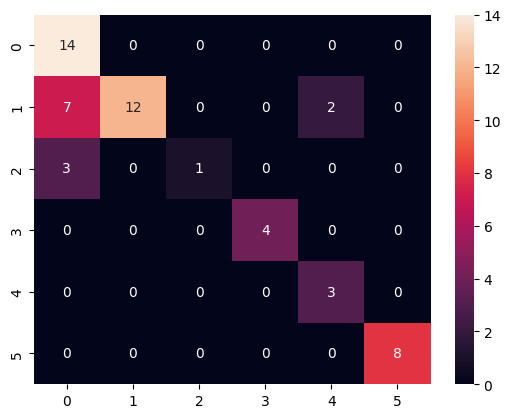

Training set using ovr classifier:   1.0  training time: 9.081666231155396
Test set using ovo classifier:  0.7407407407407407


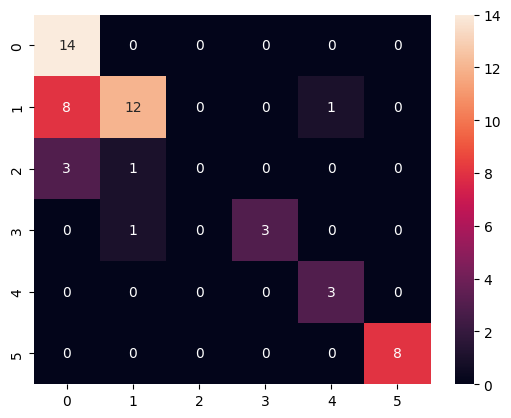

Training set using oc classifier:  1.0  training time:  14.69590139389038
Test set using oc classifier:   0.7592592592592593


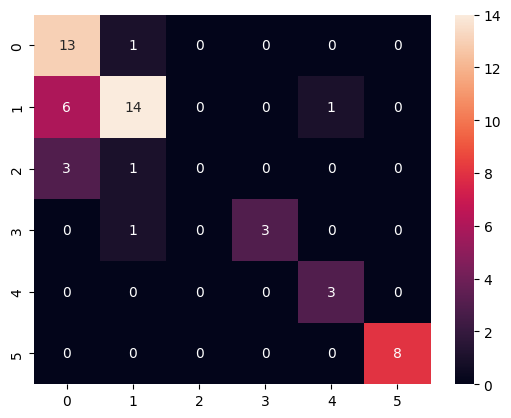

In [15]:
# 1 - 1
y_pred_knn_train = classifier_knn_ovo.predict(X_train)
accuracy_knn_train_ovo = accuracy_score(y_train, y_pred_knn_train)
print("Training set using ovo classifier: ", accuracy_knn_train_ovo, " training time: ", training_time_knn_ovo)
 
y_pred_knn_test = classifier_knn_ovo.predict(X_test)
accuracy_knn_test_ovo = accuracy_score(y_test, y_pred_knn_test)
print("Test set using ovo classifier: ", accuracy_knn_test_ovo)
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, fmt='.0f')
plt.show()

# 1 - rest
y_pred_knn_train = classifier_knn_ovr.predict(X_train)
accuracy_knn_train_ovr = accuracy_score(y_train, y_pred_knn_train)
print("Training set using ovr classifier:  ", accuracy_knn_train_ovr, " training time:", training_time_knn_ovr)

y_pred_knn_test = classifier_knn_ovr.predict(X_test)
accuracy_knn_test_ovr = accuracy_score(y_test, y_pred_knn_test)
print("Test set using ovo classifier: ", accuracy_knn_test_ovr)
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, fmt='.0f')
plt.show()

# output code
y_pred_knn_train = classifier_knn_oc.predict(X_train)
accuracy_knn_train_oc = accuracy_score(y_train, y_pred_knn_train)
print("Training set using oc classifier: ", accuracy_knn_train_oc, " training time: ", training_time_knn_oc)

y_pred_knn_test = classifier_knn_oc.predict(X_test)
accuracy_knn_test_oc = accuracy_score(y_test, y_pred_knn_test)
print("Test set using oc classifier:  ", accuracy_knn_test_oc)
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, fmt='.0f')
plt.show()

#### SVM

In [16]:
from sklearn.svm import SVC
classifier_svm = SVC()
steps = [
    ('scalar', StandardScaler()),
    ('model', SVC(random_state=42))
]
svm_pipe = Pipeline(steps)

In [17]:
parameters = { 'model__kernel' : ['linear'],
               'model__C' : [1,10,100,1000,10000],
               'model__random_state' : [42]
}
classifier_svm = GridSearchCV(svm_pipe, parameters, scoring='roc_auc', cv = 3)

classifier_svm_ovo = OneVsOneClassifier(classifier_svm)
start_svm_ovo = time.time()
classifier_svm_ovo = classifier_svm_ovo.fit(X_train, y_train.ravel())
training_time_svm_ovo = time.time() - start_svm_ovo

classifier_svm_ovr = OneVsRestClassifier(classifier_svm)
start_svm_ovr = time.time()
classifier_svm_ovr = classifier_svm_ovr.fit(X_train, y_train.ravel())
training_time_svm_ovr = time.time() - start_svm_ovr

classifier_svm_oc = OutputCodeClassifier(classifier_svm)
start_svm_oc = time.time()
classifier_svm_oc = classifier_svm_oc.fit(X_train, y_train.ravel())
training_time_svm_oc = time.time() - start_svm_oc

Training set using ovo classifier:  0.73125  training time:  13.53699803352356
Test set using ovo classifier:  0.7407407407407407


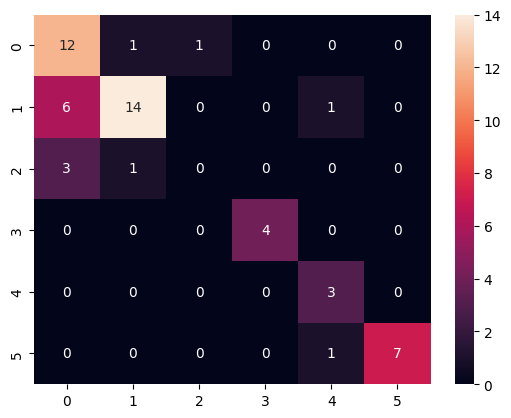

Training set using ovr classifier:  0.68125  training time:  133.23332476615906
Test set using ovr classifier:  0.6481481481481481


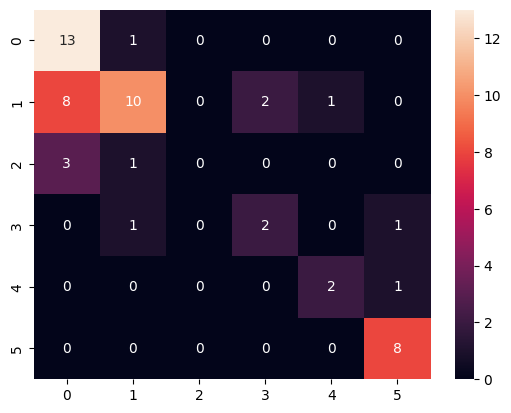

Training set using oc classifier:  0.63125  training time:  118.7681975364685
Test set using oc classifier:  0.6296296296296297


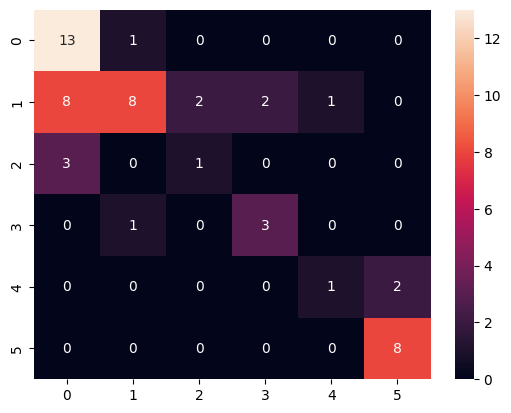

In [18]:
# 1 - 1
y_pred_svm_train = classifier_svm_ovo.predict(X_train)
accuracy_svm_train_ovo = accuracy_score(y_train, y_pred_svm_train)
print("Training set using ovo classifier: ", accuracy_svm_train_ovo, " training time: ", training_time_svm_ovo)

y_pred_svm_test = classifier_svm_ovo.predict(X_test)
accuracy_svm_test_ovo = accuracy_score(y_test, y_pred_svm_test)
print("Test set using ovo classifier: ", accuracy_svm_test_ovo)
sns.heatmap(confusion_matrix(y_test, y_pred_svm_test), annot=True, fmt='.0f')
plt.show()

# 1 - rest
y_pred_svm_train = classifier_svm_ovr.predict(X_train)
accuracy_svm_train_ovr = accuracy_score(y_train, y_pred_svm_train)
print("Training set using ovr classifier: ", accuracy_svm_train_ovr, " training time: ", training_time_svm_ovr)

y_pred_svm_test = classifier_svm_ovr.predict(X_test)
accuracy_svm_test_ovr = accuracy_score(y_test, y_pred_svm_test)
print("Test set using ovr classifier: ", accuracy_svm_test_ovr)
sns.heatmap(confusion_matrix(y_test, y_pred_svm_test), annot=True, fmt='.0f')
plt.show()

# output code
y_pred_svm_train = classifier_svm_oc.predict(X_train)
accuracy_svm_train_oc = accuracy_score(y_train, y_pred_svm_train)
print("Training set using oc classifier: ", accuracy_svm_train_oc, " training time: ", training_time_svm_oc)

y_pred_svm_test = classifier_svm_oc.predict(X_test)
accuracy_svm_test_oc = accuracy_score(y_test, y_pred_svm_test)
print("Test set using oc classifier: ", accuracy_svm_test_oc)
sns.heatmap(confusion_matrix(y_test, y_pred_svm_test), annot=True, fmt='.0f')
plt.show()

#### Naive bayes

In [19]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB

parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
classifier_nb = GridSearchCV(GaussianNB(), parameters, scoring='roc_auc', cv = 3)
classifier_nb = classifier_nb.fit(X_train, y_train.ravel())

classifier_nb_ovo = OneVsOneClassifier(classifier_nb)
start_nb_ovo = time.time()
classifier_nb_ovo = classifier_nb_ovo.fit(X_train, y_train.ravel())
training_time_nb_ovo = time.time() - start_nb_ovo

classifier_nb_ovr = OneVsRestClassifier(classifier_nb)
start_nb_ovr = time.time()
classifier_nb_ovr = classifier_nb_ovr.fit(X_train, y_train.ravel())
training_time_nb_ovr = time.time() - start_nb_ovr

classifier_nb_oc = OutputCodeClassifier(classifier_nb)
start_nb_oc = time.time()
classifier_nb_oc = classifier_nb_oc.fit(X_train, y_train.ravel())
training_time_nb_oc = time.time() - start_nb_oc

Training set using ovo classifier:  0.55  training time:  8.195141792297363
Test set using ovo classifier:  0.5555555555555556


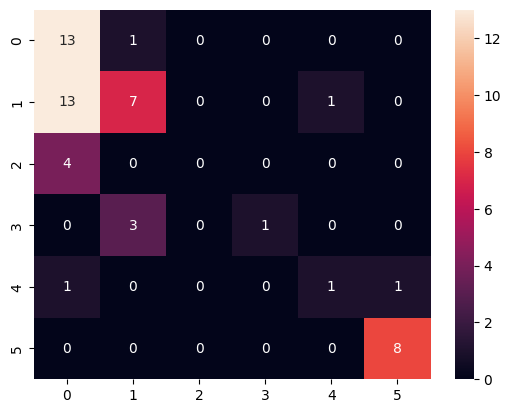

Training set using ovo classifier:  0.5625  training time:  3.4171183109283447
Test set using ovo classifier:  0.5555555555555556


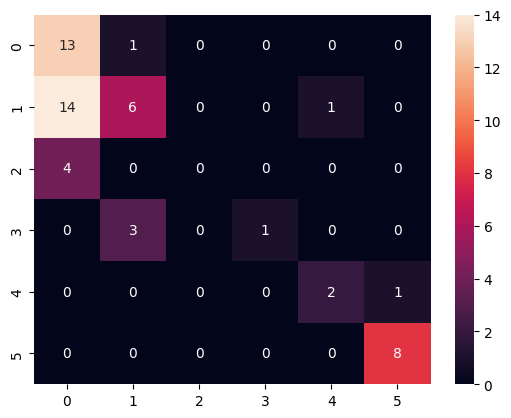

Training set using oc classifier:  0.5375  training time:  3.977139472961426
Test set using oc classifier:  0.5


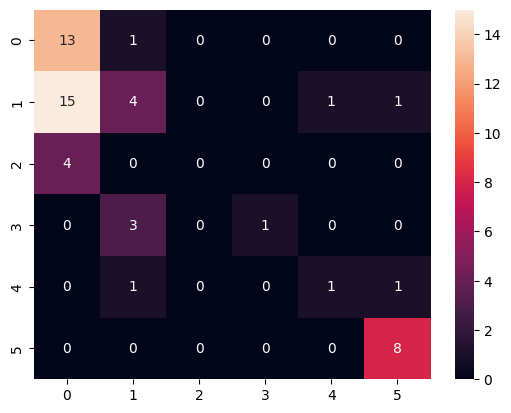

In [20]:
# 1 - 1
y_pred_nb_train = classifier_nb_ovo.predict(X_train)
accuracy_nb_train_ovo = accuracy_score(y_train, y_pred_nb_train)
print("Training set using ovo classifier: ", accuracy_nb_train_ovo, " training time: ", training_time_nb_ovo)

y_pred_nb_test = classifier_nb_ovo.predict(X_test)
accuracy_nb_test_ovo = accuracy_score(y_test, y_pred_nb_test)
print("Test set using ovo classifier: ", accuracy_nb_test_ovo)
sns.heatmap(confusion_matrix(y_test, y_pred_nb_test), annot=True, fmt='.0f')
plt.show()

# 1 - rest
y_pred_nb_train = classifier_nb_ovr.predict(X_train)
accuracy_nb_train_ovr = accuracy_score(y_train, y_pred_nb_train)
print("Training set using ovo classifier: ", accuracy_nb_train_ovr, " training time: ", training_time_nb_ovr)

y_pred_nb_test = classifier_nb_ovr.predict(X_test)
accuracy_nb_test_ovr = accuracy_score(y_test, y_pred_nb_test)
print("Test set using ovo classifier: ", accuracy_nb_test_ovr)
sns.heatmap(confusion_matrix(y_test, y_pred_nb_test), annot=True, fmt='.0f')
plt.show()

# output code
y_pred_nb_train = classifier_nb_oc.predict(X_train)
accuracy_nb_train_oc = accuracy_score(y_train, y_pred_nb_train)
print("Training set using oc classifier: ", accuracy_nb_train_oc, " training time: ", training_time_nb_oc)

y_pred_nb_test = classifier_nb_oc.predict(X_test)
accuracy_nb_test_oc = accuracy_score(y_test, y_pred_nb_test)
print("Test set using oc classifier: ", accuracy_nb_test_oc)
sns.heatmap(confusion_matrix(y_test, y_pred_nb_test), annot=True, fmt='.0f')
plt.show()

#### DTC

In [21]:
# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier()

steps = [
    ('scalar', StandardScaler()),
    ('model', DecisionTreeClassifier())
]
dt_pipe = Pipeline(steps)

In [22]:
# Applying Grid Search to find the best model and the best parameters
parameters = [ { "model__max_depth": np.arange(1,21),
                 "model__min_samples_leaf": [1, 5, 10, 20, 50, 100],
                 "model__min_samples_split": np.arange(2, 11),
                 "model__criterion": ["gini"],
                 "model__random_state" : [42]}
            ]
classifier_dtc = GridSearchCV(estimator = dt_pipe,
                           param_grid  = parameters,
                           scoring='roc_auc', 
                           cv = 3,
                           n_jobs = -1)

classifier_dtc_ovo = OneVsOneClassifier(classifier_dtc)
start_dtc_ovo = time.time()
classifier_dtc_ovo = classifier_dtc_ovo.fit(X_train, y_train.ravel())
training_time_dtc_ovo = time.time() - start_dtc_ovo

classifier_dtc_ovr = OneVsRestClassifier(classifier_dtc)
start_dtc_ovr = time.time()
classifier_dtc_ovr = classifier_dtc_ovr.fit(X_train, y_train.ravel())
training_time_dtc_ovr = time.time() - start_dtc_ovr

classifier_dtc_oc = OutputCodeClassifier(classifier_dtc)
start_dtc_oc = time.time()
classifier_dtc_oc = classifier_dtc_oc.fit(X_train, y_train.ravel())
training_time_dtc_oc = time.time() - start_dtc_oc

Training set using ovo classifier:  0.85  training time:  51.65115189552307
Test set using ovo classifier:  0.7222222222222222


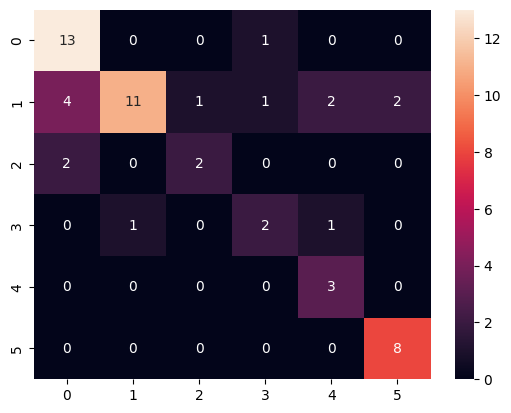

Training set using ovr classifier:  0.83125  training time:  16.81199359893799
Test set using ovr classifier:  0.7037037037037037


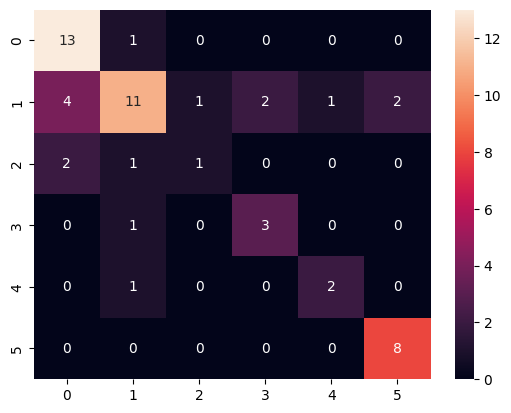

Training set using oc classifier:  0.88125  training time:  25.177643537521362
Test set using oc classifier:  0.6851851851851852


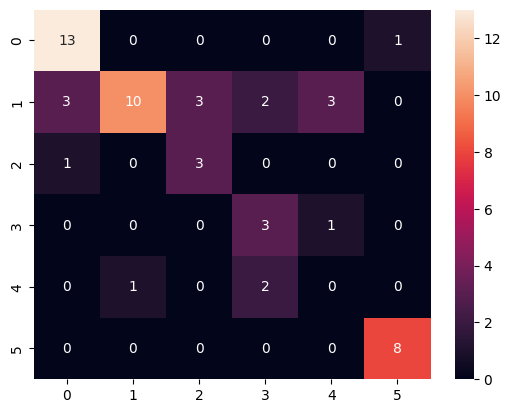

In [23]:
# 1 - 1
y_pred_dt_train = classifier_dtc_ovo.predict(X_train)
accuracy_dt_train_ovo = accuracy_score(y_train, y_pred_dt_train)
print("Training set using ovo classifier: ", accuracy_dt_train_ovo, " training time: ", training_time_dtc_ovo)

y_pred_dt_test = classifier_dtc_ovo.predict(X_test)
accuracy_dt_test_ovo = accuracy_score(y_test, y_pred_dt_test)
print("Test set using ovo classifier: ", accuracy_dt_test_ovo)
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, fmt='.0f')
plt.show()

# 1 - rest
y_pred_dt_train = classifier_dtc_ovr.predict(X_train)
accuracy_dt_train_ovr = accuracy_score(y_train, y_pred_dt_train)
print("Training set using ovr classifier: ", accuracy_dt_train_ovr, " training time: ", training_time_dtc_ovr)

y_pred_dt_test = classifier_dtc_ovr.predict(X_test)
accuracy_dt_test_ovr = accuracy_score(y_test, y_pred_dt_test)
print("Test set using ovr classifier: ", accuracy_dt_test_ovr)
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, fmt='.0f')
plt.show()

# output code
y_pred_dt_train = classifier_dtc_oc.predict(X_train)
accuracy_dt_train_oc = accuracy_score(y_train, y_pred_dt_train)
print("Training set using oc classifier: ", accuracy_dt_train_oc, " training time: ", training_time_dtc_oc)

y_pred_dt_test = classifier_dtc_oc.predict(X_test)
accuracy_dt_test_oc = accuracy_score(y_test, y_pred_dt_test)
print("Test set using oc classifier: ", accuracy_dt_test_oc)
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, fmt='.0f')
plt.show()

### Comparison models

In [24]:
models = [('Logistic Regression', accuracy_lr_train_ovo, accuracy_lr_train_ovr,  accuracy_lr_train_oc,
                                   accuracy_lr_test_ovo, accuracy_lr_test_ovr, accuracy_lr_test_oc,
                                   training_time_lr_ovo, training_time_lr_ovr, training_time_lr_oc),
          ('KNN', accuracy_knn_train_ovo, accuracy_knn_train_ovr, accuracy_knn_train_oc, 
                accuracy_knn_test_ovo, accuracy_knn_test_ovr, accuracy_knn_test_oc, 
               training_time_knn_ovo, training_time_knn_ovr, training_time_knn_oc),
          ('SVM (Linear)', accuracy_svm_train_ovo, accuracy_svm_train_ovr, accuracy_svm_train_oc, 
                       accuracy_svm_test_ovo, accuracy_svm_test_ovr, accuracy_svm_test_oc, 
                       training_time_svm_ovo, training_time_svm_ovr, training_time_svm_oc),
          ('Naive Bayes', accuracy_nb_train_ovo, accuracy_nb_train_ovr, accuracy_nb_train_oc, 
                        accuracy_nb_test_ovo, accuracy_nb_test_ovr, accuracy_nb_test_oc,
                        training_time_nb_ovo, training_time_nb_ovr, training_time_nb_oc),
          ('Decision Tree Classification', accuracy_dt_train_ovo, accuracy_dt_train_ovr, accuracy_dt_train_oc,
                        accuracy_dt_test_ovo, accuracy_dt_test_ovr, accuracy_dt_test_oc,
                        training_time_dtc_ovo, training_time_dtc_ovr, training_time_dtc_oc)
         ]

predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy OVO', 'Training Accuracy OVR', 'Training Accuracy OC', 
                                               'Test Accuracy OVO', 'Test Accuracy OVR', 'Test Accuracy OC',  
                                               'Time for training OVO', 'Time for training OVR','Time for training OC'])
predict

,Model,Training Accuracy OVO,Training Accuracy OVR,Training Accuracy OC,Test Accuracy OVO,Test Accuracy OVR,Test Accuracy OC,Time for training OVO,Time for training OVR,Time for training OC
0,Logistic Regression,0.70000,0.67500,0.66250,0.666667,0.740741,0.703704,34.938514,25.633133,33.796499
1,KNN,0.91875,1.00000,1.00000,0.777778,0.740741,0.759259,21.005230,9.081666,14.695901
2,SVM (Linear),0.73125,0.68125,0.63125,0.740741,0.648148,0.629630,13.536998,133.233325,118.768198
3,Naive Bayes,0.55000,0.56250,0.53750,0.555556,0.555556,0.500000,8.195142,3.417118,3.977139
4,Decision Tree Classification,0.85000,0.83125,0.88125,0.722222,0.703704,0.685185,51.651152,16.811994,25.177644


- Т.к. размер датасета мал, алгоритм KNN не потерял в производительности и показал наибольшую точность и скорость обучения. 
- Второй по точности результат дала стратегия One vs One, использующая модель с алгоритмом SVM, однако время обучения классификаторов со стратегиями с использованием этой модели сильно разнилось и для OVR и OC заняло больше, чем в 2 раза больше времени, чем обучение DTC (примерно 54 и 48 секунд соответственно).
- Разные стратегии, использующие NB, обучались быстрее всех, но выдали худшую точность.
- Разные стратегии, использующие логистическую регрессию, обучались долго, но OVR, обучавшаяся меньше OVO и OC, выдала сравнимую с SVM и KNN точность 0.74.
- Медленно обучалась модель с использованием построения дерева решений -- время ее обучения для каждой стратегии занимало более 15 секунд. Преимущественно наиболее высокую точность на тестовой выборке дала стратегия One vs One, а наиболее плохую стратегия OutputCode.

## Multioutput regression

### Предсказывание индекса течения реки (river flow index)

In [63]:
df = pd.read_csv('./rf1.csv')
df=df.rename(columns={'Unnamed: 0' : 'id'})
df.head()

,id,CHSI2__0,NASI2__0,EADM7__0,SCLM7__0,CLKM7__0,VALI2__0,NAPM7__0,DLDI4__0,CHSI2__-6,...,NAPM7__-60,DLDI4__-60,CHSI2_48H__0,NASI2_48H__0,EADM7_48H__0,SCLM7_48H__0,CLKM7_48H__0,VALI2_48H__0,NAPM7_48H__0,DLDI4_48H__0
0,0,288.0,3.41,276.0,194.0,63.8,8.78,166.0,59.5,NaN,...,NaN,NaN,269.0,3.33,257.0,186.0,61.2,8.07,157.0,55.1
1,1,287.0,3.40,275.0,194.0,64.1,8.81,165.0,59.4,NaN,...,NaN,NaN,269.0,3.32,257.0,185.0,61.1,8.04,157.0,55.2
2,2,288.0,3.39,274.0,193.0,63.4,8.88,165.0,59.4,NaN,...,NaN,NaN,268.0,3.32,257.0,186.0,61.3,8.14,156.0,55.2
3,3,287.0,3.39,273.0,193.0,64.0,8.70,164.0,57.9,NaN,...,NaN,NaN,268.0,3.33,257.0,185.0,61.2,8.21,156.0,55.9
4,4,287.0,3.34,273.0,193.0,64.0,8.78,165.0,57.9,NaN,...,NaN,NaN,266.0,3.31,257.0,185.0,61.4,8.04,156.0,55.9


В датасете 64 признака и 8 значений для предсказывания регрессией.

In [64]:
df.shape

(9125, 73)

In [65]:
df.dropna()

,id,CHSI2__0,NASI2__0,EADM7__0,SCLM7__0,CLKM7__0,VALI2__0,NAPM7__0,DLDI4__0,CHSI2__-6,...,NAPM7__-60,DLDI4__-60,CHSI2_48H__0,NASI2_48H__0,EADM7_48H__0,SCLM7_48H__0,CLKM7_48H__0,VALI2_48H__0,NAPM7_48H__0,DLDI4_48H__0
60,60,264.0,3.24,257.0,184.0,62.3,8.21,157.0,57.1,265.0,...,166.0,59.5,259.0,3.16,251.0,174.0,67.5,8.92,149.0,57.1
61,61,264.0,3.25,255.0,184.0,62.8,8.04,157.0,57.0,265.0,...,165.0,59.4,258.0,3.18,250.0,174.0,67.6,9.16,148.0,57.3
62,62,264.0,3.25,256.0,184.0,63.1,8.14,156.0,57.0,264.0,...,165.0,59.4,259.0,3.18,250.0,173.0,68.1,8.99,148.0,57.3
63,63,265.0,3.26,256.0,183.0,62.4,8.11,157.0,57.0,264.0,...,164.0,57.9,260.0,3.18,250.0,173.0,67.9,8.99,148.0,57.3
64,64,266.0,3.25,255.0,183.0,63.2,7.90,156.0,57.0,266.0,...,165.0,57.9,259.0,3.18,250.0,173.0,68.1,8.99,147.0,57.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9120,9120,69.1,3.20,86.1,44.5,27.0,5.14,44.7,24.6,69.1,...,44.7,24.5,75.2,3.33,86.1,45.2,24.4,5.21,44.6,22.7
9121,9121,69.2,3.18,86.1,44.1,27.2,5.18,44.7,24.6,68.9,...,44.7,25.0,75.7,3.33,86.1,45.4,24.4,5.21,44.6,23.2
9122,9122,69.2,3.15,86.1,44.3,27.2,5.33,44.7,24.6,69.5,...,44.7,25.0,76.1,3.31,86.1,45.2,24.4,5.21,44.6,23.2
9123,9123,69.0,3.17,86.1,44.4,27.2,5.48,44.7,24.6,69.2,...,44.7,25.0,75.5,3.26,86.1,45.2,24.2,5.25,44.6,23.2


Размер датасета составляет 9125 наблюдений. Т.к. наблюдения, имеющие пропущенные значения, составляют менее 2% (120 наблюдений из 9125 наблюдений) от всего датасета, они были удалены из датасета.
Также в дальнейшем нужно будет удалить столбец с идентификатором наблюдения, но пока он необходим для проведения предварительного анализа данных.

### EDA

In [66]:
col0=df.columns.tolist()

In [67]:
names=set()
times=set()
for item in col0:
    name=item.split('_')[0]
    names.add(name)
    time_feature=item[len(name)+1:]
    times.add(time_feature)
print("River names: ", names)
print("Times of observations: ", times)

River names:  {'CHSI2', 'EADM7', 'NAPM7', 'NASI2', 'SCLM7', 'VALI2', 'DLDI4', 'CLKM7', 'id'}
Times of observations:  {'', '_-12', '_-48', '_-60', '_0', '_-24', '_-18', '48H__0', '_-36', '_-6'}


Входные данные представляют собой наблюдения с задержкой по времени за 0, 6, 12, 18, 24, 36, 48 и 60 часов в прошлом для восьми разных рек.
Значение признака, который собираемся предсказывать для каждой из реки -- состояние, в котором она будет через 48 часов (суффикс признака 48H__0).

Рассмотрим, как менялся индекс речного потока на протяжении времени для каждой из рек.

In [68]:
col1=[]
for item in col0:
    if '_0' in item and '_48H' not in item:
        col1+=[item]
col1=sorted(col1)
print(col1)

['CHSI2__0', 'CLKM7__0', 'DLDI4__0', 'EADM7__0', 'NAPM7__0', 'NASI2__0', 'SCLM7__0', 'VALI2__0']


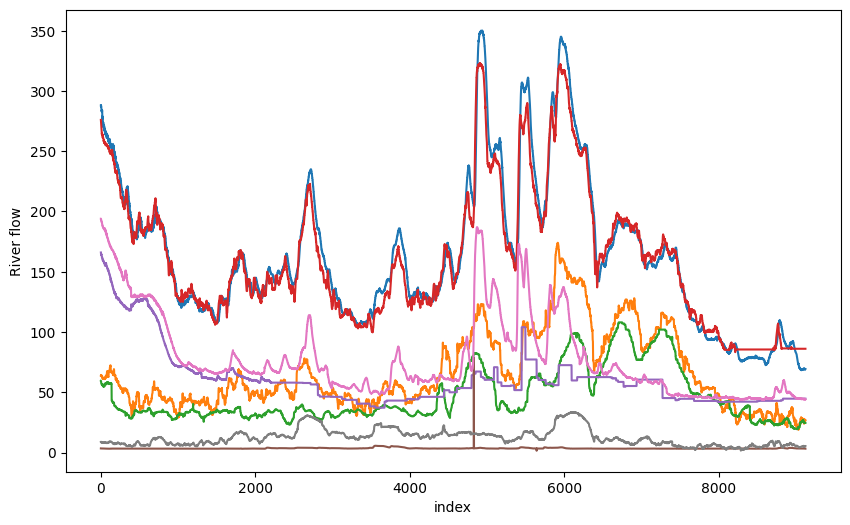

In [69]:
plt.figure(figsize=(10,6))
plt.xlabel("index")
plt.ylabel("River flow")
for item in col1:
    plt.plot(df['id'], df[item])

plt.show()    

Из графика видно, что в датасете имеются реки как с индексом речного потока, слабо меняющимся с течением времени -- например, для двух рек на протяжении 9005 наблюдений индекс немногим превышал 100, так и с сильно меняющимся с течением времени -- например,  две реки имеют индекс речного потока более 300 в окрестности шеститысячного наблюдения.

Также видно, что эти две реки имеют очень схожие графики зависимости индекса речного потока от времени наблюдения -- возможно, что соответствующие признаки для одной из рек можно удалить и предсказывать ее индекс по признакам второй реки.

Проверим корелляцию индексов течения реки для рек, рассмотрев матрицу корелляций для нулевого наблюдения.

In [70]:
import os
from scipy.io import arff

def dt(path):
    df = arff.loadarff(path)
    df = pd.DataFrame(df[0])
    return df


d = 64
df = dt("./rf1.arff")
df = df.dropna(axis=0)
X = (df.iloc[:, :d])
y = (df.iloc[:, d:])
y.head()

,CHSI2_48H__0,NASI2_48H__0,EADM7_48H__0,SCLM7_48H__0,CLKM7_48H__0,VALI2_48H__0,NAPM7_48H__0,DLDI4_48H__0
60,259.0,3.16,251.0,174.0,67.5,8.92,149.0,57.1
61,258.0,3.18,250.0,174.0,67.6,9.16,148.0,57.3
62,259.0,3.18,250.0,173.0,68.1,8.99,148.0,57.3
63,260.0,3.18,250.0,173.0,67.9,8.99,148.0,57.3
64,259.0,3.18,250.0,173.0,68.1,8.99,147.0,57.3


<AxesSubplot: >

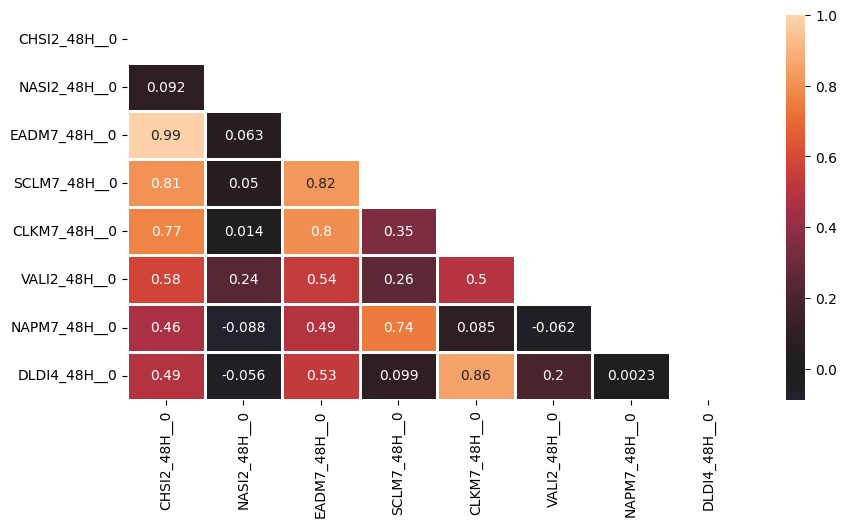

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
mask = np.triu(np.ones_like(y.corr(), dtype=bool))
sns.heatmap(y.corr(),
            annot=True,
            mask=mask,
            ax=ax,
            center=0,
            linewidths=1,
            vmax=1)

Из матрицы корелляции видно, что индексы течения рек для двух рек действительно очень кореллируются друг с другом, корелляция составляет 0.99. 
Следовательно, при чистке данных можно удалить признаки, соответствующие реки EADM7.

### Data cleaning

Удалим признаки, связанные с рекой EADM7, сократив тем самым количество признаков на 7.

In [72]:
df = df.drop(columns={'EADM7__0', 'EADM7__-6', 'EADM7__-12', 'EADM7__-24', 'EADM7__-36', 'EADM7__-48', 'EADM7__-60'})
df.shape

(9005, 65)

### Разбиение данных с использованием train_test_split и масштабирование

In [73]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (6753, 64)
Shape of X_test:  (2252, 64)
Shape of y_train:  (6753, 8)
Shape of y_test (2252, 8)


### Обучение моделей

In [74]:
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor, RegressorChain
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score

steps = [
    ('scalar', StandardScaler()),
    ('model', Ridge(random_state=42))
]

pipe = Pipeline(steps)

alpha_grid = np.logspace(-100, 100, 20)
searcher = GridSearchCV(pipe, [{"model__alpha": alpha_grid}], scoring="r2", cv=5)
searcher.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('model', Ridge(random_state=42))]),
             param_grid=[{'model__alpha': array([1.00000000e-100, 3.35981829e-090, 1.12883789e-079, 3.79269019e-069,
       1.27427499e-058, 4.28133240e-048, 1.43844989e-037, 4.83293024e-027,
       1.62377674e-016, 5.45559478e-006, 1.83298071e+005, 6.15848211e+015,
       2.06913808e+026, 6.95192796e+036, 2.33572147e+047, 7.84759970e+057,
       2.63665090e+068, 8.85866790e+078, 2.97635144e+089, 1.00000000e+100])}],
             scoring='r2')

In [76]:
import time

mo_regr = MultiOutputRegressor(searcher)
start_mo_regr = time.time()
mo_regr.fit(X_train, y_train)
mo_regr_train_time_diff = time.time() - start_mo_regr

y_pred_train = mo_regr.predict(X_train)
mo_regr_accuracy_train = r2_score(y_train, y_pred_train)
print("r2 score on train with Ridge model and multioutput regression:", mo_regr_accuracy_train)

y_pred = mo_regr.predict(X_test)
mo_regr_accuracy_test = r2_score(y_test, y_pred)
print("r2 score on test with Ridge model and multioutput regression:", mo_regr_accuracy_test)

r2 score on train with Ridge model and multioutput regression: 0.8318809585423473
r2 score on test with Ridge model and multioutput regression: 0.757419292850752


In [77]:
regr_ch = RegressorChain(searcher).fit(X_train, y_train)
start_regr_ch = time.time()
regr_ch.fit(X_train, y_train)
regr_ch_train_time_diff = time.time() - start_regr_ch

y_pred_train = regr_ch.predict(X_train)
regr_ch_accuracy_train = r2_score(y_train, y_pred_train)
print("r2 score on train with Ridge model and regressor chain:", regr_ch_accuracy_train)

y_pred = regr_ch.predict(X_test)
regr_ch_accuracy_test = r2_score(y_test, y_pred)
print("r2 score on test with Ridge model and regressor chain:", regr_ch_accuracy_test)

r2 score on train with Ridge model and regressor chain: 0.8319092321447996
r2 score on test with Ridge model and regressor chain: 0.7595552730086752


### Сравнение моделей

In [78]:
models = [('Multioutput regressor', mo_regr_accuracy_train, mo_regr_accuracy_test, mo_regr_train_time_diff),
          ('Regressor chain', regr_ch_accuracy_train, regr_ch_accuracy_test, regr_ch_train_time_diff)
         ]

predict = pd.DataFrame(data = models, columns=['Model', 'Train R2', 'Test R2', 'Train time'])
predict

,Model,Train R2,Test R2,Train time
0,Multioutput regressor,0.831881,0.757419,34.523402
1,Regressor chain,0.831909,0.759555,24.552636


Из таблицы сравнения моделей видно, что стратегия Regressor Chain показала немного более высокое значение метрики R2, чем Multioutput regressor, хотя в целом обе модели показали высокую точность. Также модель с использованием стратегии Regressor Chain быстрее обучилась.